# Real-world Data Wrangling

## Table of contents 
- [Introduction](#intro)
- [Gathering data](#Gathering-data)
  - [Problem statment](#Problem-Statement)
- [Assess data](#Assess-data)
- [Cleaning Data](#Cleaning-Data)
- [Research Quastions](#research-question)
     - [Research Quastion 1: How does the Quantity of the product (Qty), vary across different product sizes (Size) on Amazon?](#q1)
     - [Research Quastion 2: How are the number of items in stock distributed across different delivery statuses, and what percentage of the total stock is associated with each status?](#q2)
     - [Research Quastion 3: Do B2B customers tend to make larger purchases than non-B2B customers?](#q3)
 - [Reflection](#Reflection)
- [Conclusion](#conclusion)

In [1]:
#!python -m pip install kaggle==1.6.12

In [2]:
#!pip install --target=/workspace ucimlrepo

<a id=intro><a/>
# Introduction 
This project aims to analyze sales data from Amazon to understand customer purchasing patterns and identify potential areas for improvement. We will be working with two datasets: one obtained via the Amazon API and another sourced from Kaggle. The goal is to uncover insights into product demand, delivery performance, and customer segmentation.

<a id=Gathering-data><a/>
## 1. Gather data


<a id=Problem-Statement><a/>
### **1.1.** Problem Statement
The datasets used are an Amazon Sale Report Dataset obtained via API and a Sale Report Dataset sourced from Kaggle. The primary objective is to address data quality and tidiness issues within these datasets, such as missing values, outliers, and multiple variables stored in single columns. By cleaning and preparing the data, we aim to answer key research questions regarding product demand across different sizes, stock distribution across delivery statuses, and purchase behavior differences between B2B and non-B2B customers.  
To address these questions,cleaning and preprocessing the data obtained from the Amazon Sale Report Dataset and the Sale Report Dataset from Kaggle.

In [3]:
import requests
import zipfile
import pandas as pd
import base64
import io
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle



### **1.2.** Gather at least two datasets using two different data gathering methods


#### **Amazon Sale Report Dataset**

*Type: CSV File.*  
*Method: The data was gathered using the API method from Kaggle.*

>I selected the Amazon Sales Report dataset because it provides comprehensive sales data over time, which is crucial for understanding sales patterns, revenue trends, and seasonal fluctuations for products sold on Amazo

#### Dataset Key variables:

   | Field Name       | Description                              |
|------------------|------------------------------------------|
| Category         | Type of product. (String)                |
| Size             | Size of the product. (String)            |
| Date             | Date of the sale. (Date)                 |
| Status           | Status of the sale. (String)             |
| Fulfilment       | Method of fulfilment. (String)           |
| Style            | Style of the product. (String)           |
| SKU              | Stock Keeping Unit. (String)             |
| ASIN             | Amazon Standard Identification Number. (String) |
| Courier Status   | Status of the courier. (String)          |
| Qty              | Quantity of the product. (Integer)       |
| Amount           | Amount of the sale. (Float)              |
| B2B              | Business to business sale. (Boolean)     |
| Currency         | The currency used for the sale. (String) |


In [4]:
# 1st data gathering and loading method

In [5]:
# Preparing the URL.
base_url = "https://www.kaggle.com/api/v1"
owner_slug = "thedevastator"
dataset_slug = "unlock-profits-with-e-commerce-sales-data"
dataset_version = "2"

url = f"{base_url}/datasets/download/{owner_slug}/{dataset_slug}?datasetVersionNumber={dataset_version}"
url

'https://www.kaggle.com/api/v1/datasets/download/thedevastator/unlock-profits-with-e-commerce-sales-data?datasetVersionNumber=2'

In [6]:
# Encoding the credentials .
username = "<shymaaalbzour>"
key = "<6597001689234fb3870c1672c6907fd2>"
creds = base64.b64encode (bytes(f"{username}:{key}", "ISO-8859-1")).decode("ascii")
headers = {
  "Authorization": f"Basic {creds}"
}

In [7]:
#Sending a GET request to the URL with the encoded credentials.
response = requests.get(url, headers = headers)

# Loading the response as a file via io and opening it via zipfile.
zf = zipfile.ZipFile(io.BytesIO(response.content))

# Reading the CSV from the zip file and converting it to a dataframe.
file_name = "Amazon Sale Report.csv"
df = pd.read_csv(zf.open(file_name))
df

C:\Users\user\AppData\Local\Temp\ipykernel_10552\1781717086.py:9: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zf.open(file_name))


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


#### **Sale Report Dataset**
*Type: CSV File.*  
*Method: The data was gathered manually from Kaggle.*



>I selested this dataset because it provides detailed information about e-commerce sales, including product details like SKU, design, stock, category, size, and color. Which is useful for analyzing sales trends, optimizing profitability, managing inventory, and understanding customer preferences.

Dataset Key variables:

| Column Name | Description                                      | Data Type |
|-------------|--------------------------------------------------|-----------|
| SKU Code    | Unique identifier for each product              | String    |
| Design No.  | Unique identifier for each design               | String    |
| Stock       | Number of items in stock                        | Integer   |
| Category    | Type of product                                 | String    |
| Size        | Size of the product                             | String    |
| Color       | Color of the product                            | String    |


In [8]:
#2nd data gathering and loading method

In [9]:
df2=pd.read_csv('C:\\Users\\user\\Downloads\\Sale Report.csv')
df2.head

<bound method NDFrame.head of       index       SKU Code Design No.  Stock       Category Size Color
0         0    AN201-RED-L      AN201    5.0  AN : LEGGINGS    L   Red
1         1    AN201-RED-M      AN201    5.0  AN : LEGGINGS    M   Red
2         2    AN201-RED-S      AN201    3.0  AN : LEGGINGS    S   Red
3         3   AN201-RED-XL      AN201    6.0  AN : LEGGINGS   XL   Red
4         4  AN201-RED-XXL      AN201    3.0  AN : LEGGINGS  XXL   Red
...     ...            ...        ...    ...            ...  ...   ...
9266   9266            NaN        NaN    NaN            NaN  NaN   NaN
9267   9267            NaN        NaN    NaN            NaN  NaN   NaN
9268   9268            NaN        NaN    NaN            NaN  NaN   NaN
9269   9269            NaN        NaN    NaN            NaN  NaN   NaN
9270   9270            NaN        NaN    NaN            NaN  NaN   NaN

[9271 rows x 7 columns]>

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [10]:
#Optional: store the raw data in your local data store

<a id=Assess-data></a>
## 2. Assess data

#### <u>Quality Issue 1:Missing Values in Amazon Sale Report Dataset</u>

In [11]:
#Inspecting the dataframe visually

In [12]:
df.sample()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
43908,43908,171-0806419-8528320,04-04-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET393,SET393-KR-NP-XS,Set,...,INR,955.0,NIRMAL,TELANGANA,504106.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN


In [13]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [14]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128974,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [15]:
#Inspecting the dataframe programmatically

In [16]:
print(df)

         index             Order ID      Date                        Status  \
0            0  405-8078784-5731545  04-30-22                     Cancelled   
1            1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  04-30-22                       Shipped   
3            3  403-9615377-8133951  04-30-22                     Cancelled   
4            4  407-1069790-7240320  04-30-22                       Shipped   
...        ...                  ...       ...                           ...   
128970  128970  406-6001380-7673107  05-31-22                       Shipped   
128971  128971  402-9551604-7544318  05-31-22                       Shipped   
128972  128972  407-9547469-3152358  05-31-22                       Shipped   
128973  128973  402-6184140-0545956  05-31-22                       Shipped   
128974  128974  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel  ship-service-level

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [18]:
print(df.isnull().sum().sum())

210495


In [19]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

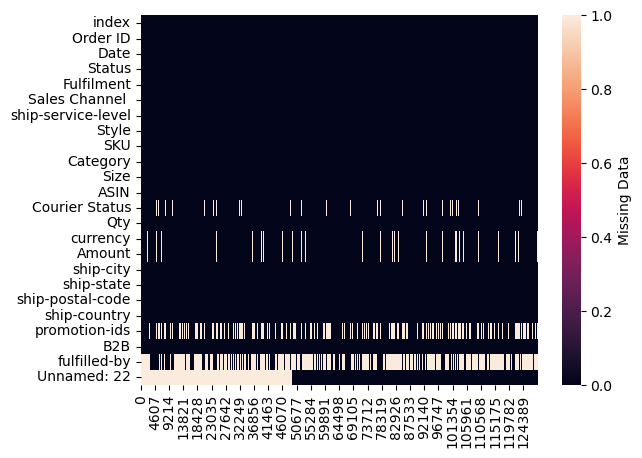

In [20]:
sns.heatmap(df.isna().transpose(),
            cbar_kws={'label': 'Missing Data'}); 

<u> **Issue and justification:** </u>

**Issue:**
The Courier Status, currency, Amount, ship-city, ship-state, ship-postal-code, ship-country, promotion-ids, fulfilled-by and Unnamed: 22 columns in the dataset contains missing value.  

**Justification:**  Missing values in these critical columns could compromise data quality, skew analysis results, and affect algorithm performance. Ensuring complete data in these columns allows for accurate analysis, reliable insights, thereby supporting better decision-making and operational efficiency.

### Quality Issue 2: Outliers in Stock column Sale Report Dataset

In [21]:
#Inspecting the dataframe visually

In [22]:
df2.head()

,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


In [23]:
df2.tail()

,index,SKU Code,Design No.,Stock,Category,Size,Color
9266,9266,NaN,NaN,NaN,NaN,NaN,NaN
9267,9267,NaN,NaN,NaN,NaN,NaN,NaN
9268,9268,NaN,NaN,NaN,NaN,NaN,NaN
9269,9269,NaN,NaN,NaN,NaN,NaN,NaN
9270,9270,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df2.sample(6)

,index,SKU Code,Design No.,Stock,Category,Size,Color
1956,1956,J0230-SKD-M,J0230,152.0,KURTA SET,M,Blue
2563,2563,J0345-SET-XS,J0345,0.0,SET,XS,Cream
6034,6034,JNE3790-KR-XXXL,JNE3790,5.0,KURTA,XXXL,Navy Blue
5614,5614,JNE3722-KR-M,JNE3722,5.0,KURTA,M,Navy Blue
4365,4365,JNE3477-KR-XL,JNE3477,4.0,KURTA,XL,Peach
2745,2745,J0388-TP-XS,J0388,29.0,TOP,XS,Red


In [25]:
#Inspecting the dataframe programmatically

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271 entries, 0 to 9270
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       9271 non-null   int64  
 1   SKU Code    9188 non-null   object 
 2   Design No.  9235 non-null   object 
 3   Stock       9235 non-null   float64
 4   Category    9226 non-null   object 
 5   Size        9235 non-null   object 
 6   Color       9226 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 507.1+ KB


In [27]:
df2['Stock'].describe()

count    9235.000000
mean       26.246454
std        58.462891
min         0.000000
25%         3.000000
50%         8.000000
75%        31.000000
max      1234.000000
Name: Stock, dtype: float64

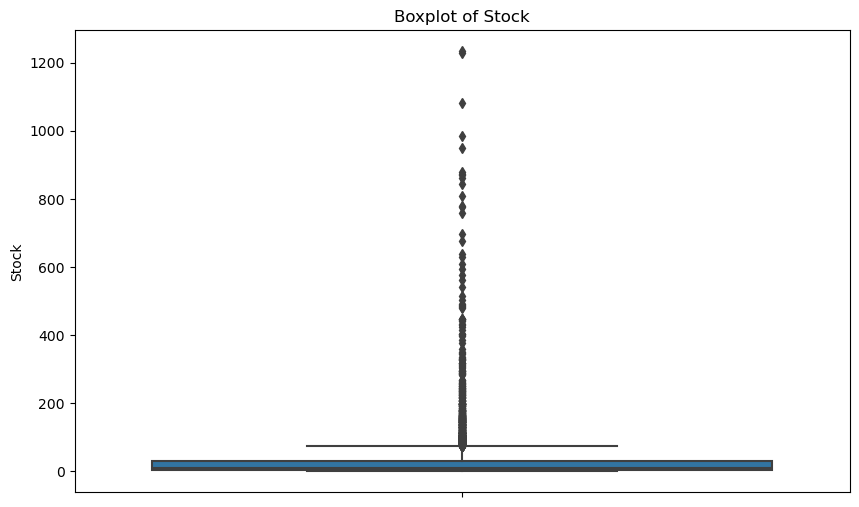

In [28]:
#  Create the boxplot

column_name = 'Stock'

plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, y=column_name)

# Add title and labels
plt.title(f'Boxplot of {column_name}')
plt.ylabel(column_name)

# Display the plot
plt.show()

This boxplot provides a visual representation of the distribution of the "Stock" variable,highlights the presence of outliers of the data distribution in the column.

<u> **Issue and justification:** </u>

**Issue:** The Stock column in the dataset contains outliers.

**Justification:** Financial data, such as the Number of items in stock column, is crucial for business insights and decision-making. Outliers can represent errors, fraud, or rare events that are not indicative of normal business operations.

### Tidiness Issue 1:Multiple variables stored in one column in amazon sale report data

In [29]:
#Inspecting the dataframe visually

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [31]:
#Inspecting the dataframe programmatically

*Inspecting the `Status` column*

In [32]:
#describe the data
df['Status'].describe()

count      128975
unique         13
top       Shipped
freq        77804
Name: Status, dtype: object

In [33]:
# use .value_counts() on the data
df['Status'].value_counts()

Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

*Inspecting the `SKU` column*

In [34]:
df['SKU'].describe()

count           128975
unique            7195
top       JNE3797-KR-L
freq               773
Name: SKU, dtype: object

In [35]:
df['SKU'].value_counts()

SKU
JNE3797-KR-L       773
JNE3797-KR-M       657
JNE3797-KR-S       587
JNE3405-KR-L       535
J0230-SKD-M        507
                  ... 
BTM004-XXXL          1
BL090-XS             1
BTM045-PP-M          1
SET034-KR-NP-XS      1
SET045-KR-NP-M       1
Name: count, Length: 7195, dtype: int64

*Inspecting the `Size` column*

In [36]:
df['Size'].value_counts()

Size
M       22711
L       22132
XL      20876
XXL     18096
S       17090
3XL     14816
XS      11161
6XL       738
5XL       550
4XL       427
Free      378
Name: count, dtype: int64

<u> **Issue and justification:** </u>

The amazon sale report data's (status) column has **Multiple variables stored in one column**, i.e., multiple variables stored in one column. There are about 10 unique values in this column! It contains the Delivery Statuses and shipping Statuses. However, there is already a variable representing the shipping Statuses(Courier Status) containing  the current stage of an item or order within the process of being shipped from one location  to another.  

### Tidiness Issue 2:Multiple variables stored in one column & Redundant data

In [37]:
# Inspecting the dataframe visually

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271 entries, 0 to 9270
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       9271 non-null   int64  
 1   SKU Code    9188 non-null   object 
 2   Design No.  9235 non-null   object 
 3   Stock       9235 non-null   float64
 4   Category    9226 non-null   object 
 5   Size        9235 non-null   object 
 6   Color       9226 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 507.1+ KB


In [39]:
df2.head()

,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


In [40]:
df2.tail()

,index,SKU Code,Design No.,Stock,Category,Size,Color
9266,9266,NaN,NaN,NaN,NaN,NaN,NaN
9267,9267,NaN,NaN,NaN,NaN,NaN,NaN
9268,9268,NaN,NaN,NaN,NaN,NaN,NaN
9269,9269,NaN,NaN,NaN,NaN,NaN,NaN
9270,9270,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#Inspecting the dataframe programmatically

In [42]:
#df2[["SKU Code","Size"]].sample(10)

In [43]:
# Accessing specific data
print(f"First row: \n{df2.iloc[1]}")

First row: 
index                     1
SKU Code        AN201-RED-M
Design No.            AN201
Stock                   5.0
Category      AN : LEGGINGS
Size                      M
Color                   Red
Name: 1, dtype: object


<u> **Issue and justification:** </u>  
**Incorrectly Combined Data in "SKU Code" Column that already exist in "size" Column**.The "SKU Code" column currently combines the product code (e.g., J0140-SET, JNE3718-KR) and the size (e.g., XS, XL). This format makes analysis challenging as the data needs to be separated into distinct columns for each variable.  

Additionally, **The sizes in "SKU Code" column is redundant** the size is already included within the "Size" column. This redundancy can lead to inconsistencies and complexity in data analysis.

<a id=Cleaning-Data><a/>
## 3. Clean data

In [44]:
#  Make copies of the datasets to ensure the raw dataframes are not impacted
df_copy = df.copy()
df2_copy = df2.copy()

### **Quality Issue 1:Missing values**

In [45]:
#Apply the cleaning strategy

In [46]:
df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [47]:
#Drop Rows with Missing Values
cleaned_df= df.dropna()

In [48]:
cleaned_df.describe()

,index,Qty,Amount,ship-postal-code
count,19379.000000,19379.000000,19379.000000,19379.000000
mean,86650.405542,1.004799,673.245162,464618.933743
std,22204.535858,0.082081,287.866514,191536.937504
min,49051.000000,1.000000,0.000000,110001.000000
25%,67813.000000,1.000000,471.000000,380058.000000
50%,83317.000000,1.000000,678.000000,500032.000000
75%,105153.500000,1.000000,786.000000,600039.000000
max,128891.000000,5.000000,2796.000000,855107.000000


In [49]:
# Validate the cleaning was successful

*Check for Remaining Missing Values:*

In [50]:
#For amazon review dataset: Check programmatically that number of NA values is 0
assert cleaned_df.isnull().sum().sum() == 0

In [51]:
# Calculate the total number of null values in the dataset
total_nulls = cleaned_df.isnull().sum().sum()

In [52]:
# Check if the total number of null values is zero
if total_nulls == 0:
    print("The dataset has no null values.")
else:
    print(f"The dataset has {total_nulls} null values.")

The dataset has no null values.


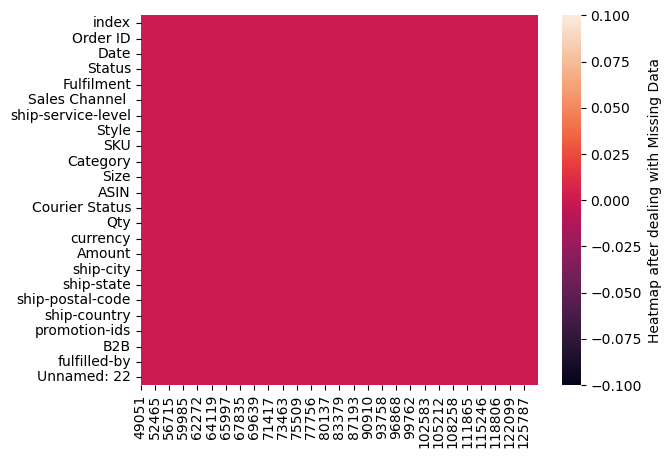

In [53]:
sns.heatmap(cleaned_df.isna().transpose(),
            cbar_kws={'label': 'Heatmap after dealing with Missing Data'}); 

**Justification:** I choose to drop the rows with null values to maintain data integrity and ensure the dataset is complete enough for analysis.    
Handling missing values improves the dataset's overall quality, making it more reliable for generating insights and making informed decisions. Ensuring that the dataset is complete also facilitates better visualization and reporting, providing a clearer and more accurate representation of the data.

### **Quality Issue 2:Outliers**

In [54]:
# Apply the cleaning strategy

In [55]:
df2.describe()

,index,Stock
count,9271.000000,9235.000000
mean,4635.000000,26.246454
std,2676.451507,58.462891
min,0.000000,0.000000
25%,2317.500000,3.000000
50%,4635.000000,8.000000
75%,6952.500000,31.000000
max,9270.000000,1234.000000


In [56]:
df2.Stock.sort_values()

5245    0.0
730     0.0
5158    0.0
5160    0.0
1527    0.0
       ... 
9266    NaN
9267    NaN
9268    NaN
9269    NaN
9270    NaN
Name: Stock, Length: 9271, dtype: float64

In [57]:
cleaned_df2 = df2.dropna()

In [58]:
cleaned_df2 

,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red
...,...,...,...,...,...,...,...
9230,9230,SET462-KR-NP-S,SET462,44.0,SET,S,Teal
9231,9231,SET462-KR-NP-XL,SET462,58.0,SET,XL,Teal
9232,9232,SET462-KR-NP-XS,SET462,20.0,SET,XS,Teal
9233,9233,SET462-KR-NP-XXL,SET462,66.0,SET,XXL,Teal


 *Remove outliers entirely from the dataset*

In [59]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df2['Stock'].quantile(0.25)
Q3 = df2['Stock'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 0 * IQR
upper_bound = Q3 + 0 * IQR

# Filter out the outliers
cleaned_df2 = df2[(df2['Stock'] >= lower_bound) & (df2['Stock'] <= upper_bound)]

print("Original Dataset:")
print(df2)
print("\ncleaned Dataset without outliers:")
print(cleaned_df2)


Original Dataset:
      index       SKU Code Design No.  Stock       Category Size Color
0         0    AN201-RED-L      AN201    5.0  AN : LEGGINGS    L   Red
1         1    AN201-RED-M      AN201    5.0  AN : LEGGINGS    M   Red
2         2    AN201-RED-S      AN201    3.0  AN : LEGGINGS    S   Red
3         3   AN201-RED-XL      AN201    6.0  AN : LEGGINGS   XL   Red
4         4  AN201-RED-XXL      AN201    3.0  AN : LEGGINGS  XXL   Red
...     ...            ...        ...    ...            ...  ...   ...
9266   9266            NaN        NaN    NaN            NaN  NaN   NaN
9267   9267            NaN        NaN    NaN            NaN  NaN   NaN
9268   9268            NaN        NaN    NaN            NaN  NaN   NaN
9269   9269            NaN        NaN    NaN            NaN  NaN   NaN
9270   9270            NaN        NaN    NaN            NaN  NaN   NaN

[9271 rows x 7 columns]

cleaned Dataset without outliers:
      index           SKU Code Design No.  Stock       Category  Size 

In [60]:
#Validate the cleaning was successful

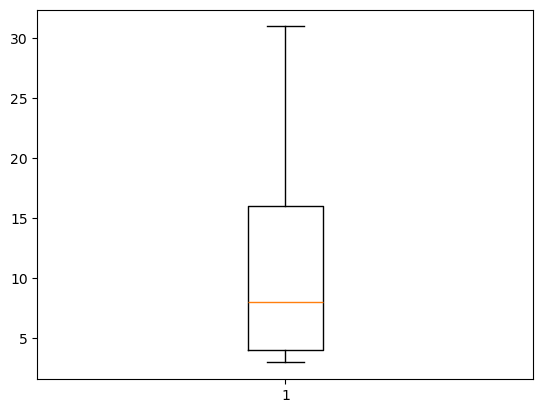

In [61]:
plt.boxplot(cleaned_df2['Stock'])
plt.show()

It does not appear that there are any obvious outliers present.Because,there is no data points plotted as individual dots.

**Justification:**  Removing outliers ensures that decisions are based on typical and relevant data.

### **Tidiness Issue 1: Multiple variables stored in one column**

In [62]:
#Apply the cleaning strategy

Tidiness Issue 1.1

In [63]:
import re

def remove_size_indicators(sku_string):
    """
    Remove size indicators from the SKU string, retaining other parts.
    Size indicators are: 'XS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL', 'XXS','XXXS','FREE'.
    
    Args:
    sku_string (str): The SKU string.
    
    Returns:
    str: The SKU string with size indicators removed.
    """
    # List of size indicators to remove
    size_indicators = ['XS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL', 'XXS','XXXS','FREE']
    
    # Create a regular expression pattern to match size indicators
    size_pattern = '|'.join(size_indicators)
    
    # Use regex to replace size indicators with an empty string
    cleaned_sku = re.sub(size_pattern, '', sku_string, flags=re.IGNORECASE)
    
    # Remove extra dashes or spaces that may be left after removal
    cleaned_sku = re.sub(r'-+', '-', cleaned_sku).strip('-')
    
    return cleaned_sku


# Apply the function to the "SKU" column and create a new column "SKU_Cleaned"
cleaned_df['SKU_Cleaned'] = cleaned_df['SKU'].apply(remove_size_indicators)

C:\Users\user\AppData\Local\Temp\ipykernel_10552\318342818.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['SKU_Cleaned'] = cleaned_df['SKU'].apply(remove_size_indicators)


In [64]:
#Validate the cleaning was successful

In [65]:
print(cleaned_df[['SKU', 'SKU_Cleaned']])

                   SKU SKU_Cleaned
49051       J0385-KR-M    J0385-KR
49077   JNE3654-TP-XXL  JNE3654-TP
49081    JNE3798-KR-XS  JNE3798-KR
49082       J0152-DR-L    J0152-DR
49083      J0157-DR-XL    J0157-DR
...                ...         ...
128872      J0243-DR-S    J0243-DR
128873     J0079-SKD-S    J0079-KD
128874     J0009-SKD-S    J0009-KD
128887      J0301-TP-M    J0301-TP
128891    JNE3869-DR-M  JNE3869-DR

[19379 rows x 2 columns]


Tidiness Issue 1.2

In [66]:
#split the variable into multiple variables/columns
cleaned_df[['shippment Status', 'Delivery status']] = cleaned_df['Status'].str.split('-',n=1, expand=True)
cleaned_df

C:\Users\user\AppData\Local\Temp\ipykernel_10552\3245916563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[['shippment Status', 'Delivery status']] = cleaned_df['Status'].str.split('-',n=1, expand=True)
C:\Users\user\AppData\Local\Temp\ipykernel_10552\3245916563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[['shippment Status', 'Delivery status']] = cleaned_df['Status'].str.split('-',n=1, expand=True)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,SKU_Cleaned,shippment Status,Delivery status
49051,49051,408-4858463-2356347,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0385,J0385-KR-M,kurta,...,ANDHRA PRADESH,533126.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,J0385-KR,Shipped,Delivered to Buyer
49077,49077,402-7697834-2682766,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3654,JNE3654-TP-XXL,Top,...,TAMIL NADU,600042.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,JNE3654-TP,Shipped,Delivered to Buyer
49081,49081,402-7031777-0396341,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3798,JNE3798-KR-XS,Western Dress,...,KERALA,695541.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,JNE3798-KR,Shipped,Delivered to Buyer
49082,49082,408-1235521-4337163,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0152,J0152-DR-L,Western Dress,...,JAMMU & KASHMIR,194101.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,J0152-DR,Shipped,Delivered to Buyer
49083,49083,403-3845187-4421165,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0157,J0157-DR-XL,Western Dress,...,MAHARASHTRA,411027.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,J0157-DR,Shipped,Delivered to Buyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128872,128872,405-4724097-1016369,06-01-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0243,J0243-DR-S,Ethnic Dress,...,ANDHRA PRADESH,524315.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,J0243-DR,Shipped,Delivered to Buyer
128873,128873,405-4724097-1016369,06-01-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0079,J0079-SKD-S,Set,...,ANDHRA PRADESH,524315.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,J0079-KD,Shipped,Delivered to Buyer
128874,128874,405-4724097-1016369,06-01-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0009,J0009-SKD-S,Set,...,ANDHRA PRADESH,524315.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,J0009-KD,Shipped,Delivered to Buyer
128887,128887,405-6493630-8542756,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0301,J0301-TP-M,Top,...,UTTAR PRADESH,201301.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,J0301-TP,Shipped,Delivered to Buyer


In [67]:
#Validate the cleaning was successful

In [68]:
#test  if columns  exists in dataset

if 'shippment Status' in df.columns:
    print(f" 'shippment Status' Column exists in the dataset.")
else:
    print(f"'shippment Status' Column does not exist in the dataset.")



if 'Delivery status' in df.columns:
    print(f" &'Delivery status' Column exists in the dataset.")
else:
    print(f" &' Delivery status' Column  does not exist in the dataset.")


'shippment Status' Column does not exist in the dataset.
 &' Delivery status' Column  does not exist in the dataset.


**Justification:** By splitting the Status column into shippment Status and Delivery status, each column now represents a single variable. This separation makes it easier to understand and analyze each aspect independently.

### **Tidiness Issue 2: Multiple variables stored in one column(SKU Code)**

In [69]:
#Apply the cleaning strategy

In [70]:
import re

def remove_size_indicators(sku_string):
    """
    Remove size indicators from the SKU string, retaining other parts.
    Size indicators are: 'XS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL', 'XXS','XXXS','FREE'.
    
    Args:
    sku_string (str): The SKU string.
    
    Returns:
    str: The SKU string with size indicators removed.
    """
    # List of size indicators to remove
    size_indicators = ['XS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL', 'XXS','XXXS','FREE']
    
    # Create a regular expression pattern to match size indicators
    size_pattern = '|'.join(size_indicators)
    
    # Use regex to replace size indicators with an empty string
    cleaned_sku = re.sub(size_pattern, '', sku_string, flags=re.IGNORECASE)
    
    # Remove extra dashes or spaces that may be left after removal
    cleaned_sku = re.sub(r'-+', '-', cleaned_sku).strip('-')
    
    return cleaned_sku


# Apply the function to the "SKU" column and create a new column "SKU_Cleaned"
cleaned_df2['SKU_Cleaned'] = cleaned_df2['SKU Code'].apply(remove_size_indicators)

C:\Users\user\AppData\Local\Temp\ipykernel_10552\601687685.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df2['SKU_Cleaned'] = cleaned_df2['SKU Code'].apply(remove_size_indicators)


In [71]:
cleaned_df2

,index,SKU Code,Design No.,Stock,Category,Size,Color,SKU_Cleaned
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red,AN201-RED
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red,AN201-RED
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red,AN201-RED
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red,AN201-RED
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red,AN201-RED
...,...,...,...,...,...,...,...,...
9190,9190,SET444-KR-SH-XS,SET444,17.0,SET,XS,Peach,ET444-KR-H
9191,9191,SET444-KR-SH-XXL,SET444,12.0,SET,XXL,Peach,ET444-KR-H
9192,9192,SET444-KR-SH-XXXL,SET444,17.0,SET,XXXL,Peach,ET444-KR-H
9200,9200,SET446-KR-NP-L,SET446,17.0,SET,L,Teal,ET446-KR-NP


In [72]:
#Validate the cleaning was successful

In [73]:
print(cleaned_df2[['SKU Code', 'SKU_Cleaned']])

               SKU Code  SKU_Cleaned
0           AN201-RED-L    AN201-RED
1           AN201-RED-M    AN201-RED
2           AN201-RED-S    AN201-RED
3          AN201-RED-XL    AN201-RED
4         AN201-RED-XXL    AN201-RED
...                 ...          ...
9190    SET444-KR-SH-XS   ET444-KR-H
9191   SET444-KR-SH-XXL   ET444-KR-H
9192  SET444-KR-SH-XXXL   ET444-KR-H
9200     SET446-KR-NP-L  ET446-KR-NP
9232    SET462-KR-NP-XS  ET462-KR-NP

[4751 rows x 2 columns]


**Justification:**  removing size indicators from SKU codes, create cleaner, consistent SKUs for better analysis.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [74]:
# Remove unnecessary variables and combine datasets

*Remove unnecessary variables from amazon sale report dataset:*

In [75]:
cleaned_df.drop('Date', axis=1,  inplace=True)
cleaned_df.drop('SKU', axis=1,  inplace=True)
cleaned_df.drop('index', axis=1, inplace=True)
cleaned_df.drop('Status', axis=1, inplace=True)
cleaned_df.drop('Unnamed: 22', axis=1 ,inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_10552\979247907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop('Date', axis=1,  inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_10552\979247907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop('SKU', axis=1,  inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_10552\979247907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dr

In [76]:
cleaned_df2

,index,SKU Code,Design No.,Stock,Category,Size,Color,SKU_Cleaned
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red,AN201-RED
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red,AN201-RED
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red,AN201-RED
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red,AN201-RED
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red,AN201-RED
...,...,...,...,...,...,...,...,...
9190,9190,SET444-KR-SH-XS,SET444,17.0,SET,XS,Peach,ET444-KR-H
9191,9191,SET444-KR-SH-XXL,SET444,12.0,SET,XXL,Peach,ET444-KR-H
9192,9192,SET444-KR-SH-XXXL,SET444,17.0,SET,XXXL,Peach,ET444-KR-H
9200,9200,SET446-KR-NP-L,SET446,17.0,SET,L,Teal,ET446-KR-NP


*Remove unnecessary variables from sale report dataset:*

In [77]:
cleaned_df2.drop('SKU Code', axis=1, inplace=True)
cleaned_df2.drop('Size', axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10552\2200201250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df2.drop('SKU Code', axis=1, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_10552\2200201250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df2.drop('Size', axis=1, inplace=True)


*merge the datasets:*

In [78]:
merged_df = pd.merge(cleaned_df,cleaned_df2, on='SKU_Cleaned')

In [79]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72811 entries, 0 to 72810
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order ID            72811 non-null  object 
 1   Fulfilment          72811 non-null  object 
 2   Sales Channel       72811 non-null  object 
 3   ship-service-level  72811 non-null  object 
 4   Style               72811 non-null  object 
 5   Category_x          72811 non-null  object 
 6   Size                72811 non-null  object 
 7   ASIN                72811 non-null  object 
 8   Courier Status      72811 non-null  object 
 9   Qty                 72811 non-null  int64  
 10  currency            72811 non-null  object 
 11  Amount              72811 non-null  float64
 12  ship-city           72811 non-null  object 
 13  ship-state          72811 non-null  object 
 14  ship-postal-code    72811 non-null  float64
 15  ship-country        72811 non-null  object 
 16  prom

In [80]:
# Create a new index column
merged_df['Index'] = range(len(merged_df))

# Set 'Index' as the index
merged_df = merged_df.set_index('Index')

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [81]:
#saving data

In [82]:
# Create directories for raw and cleaned data
data_store_dir = "data_store"
raw_data_dir = os.path.join(data_store_dir, "raw")
cleaned_data_dir = os.path.join(data_store_dir, "cleaned")

os.makedirs(data_store_dir, exist_ok=True)
os.makedirs(raw_data_dir, exist_ok=True)
os.makedirs(cleaned_data_dir, exist_ok=True)

# Save the raw API-based dataset
raw_api_dataset_file = os.path.join(raw_data_dir, "AmazonSaleReport.pkl")
with open(raw_api_dataset_file, "wb") as f:
    pickle.dump(cleaned_df, f)  

# Save the raw CSV-based dataset
raw_csv_dataset_file = os.path.join(raw_data_dir, "Sale Report.csv")
cleaned_df2.to_csv(raw_csv_dataset_file, index=False)  

# Save the cleaned datasets
cleaned_api_dataset_file = os.path.join(cleaned_data_dir, "AmazonSaleReport.pkl")
with open(cleaned_api_dataset_file, "wb") as f:
    pickle.dump(cleaned_df, f)

cleaned_csv_dataset_file = os.path.join(cleaned_data_dir, "cleaned_Sale Report.csv")
cleaned_df2.to_csv(cleaned_csv_dataset_file, index=False)

# Save the merged and cleaned dataset
merged_df_file = os.path.join(cleaned_data_dir, "cleaned_merged_dataset.csv")
merged_df.to_csv(merged_df_file, index=False)  


<a id=research-question><a/>
## 5. Research question

<a id=q1><a/>
#### **Research question 1 :** <u>How does the Quantity of the product (Qty), vary across different product sizes (Size) on Amazon?</u>

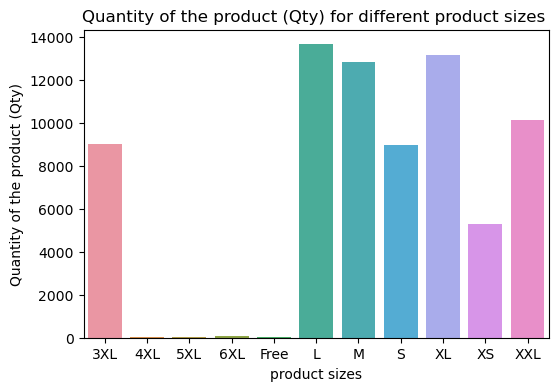

In [83]:
# Group by overall rating
df_rating = merged_df.groupby('Size').agg({'Qty': 'sum'}).reset_index()

# Create the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=df_rating, x='Size', y='Qty')

# Customize the plot
plt.title('Quantity of the product (Qty) for different product sizes ')
plt.xlabel('product sizes')
plt.ylabel('Quantity of the product (Qty)')
plt.show()


This chart shows the quantity (demand) for different product sizes, ranging from 3XL to XXL, as well as some additional sizes like Free, L, M, and S. The key observations are:

*(M ,XL and L) sizes*   have the highest demand, indicating they are the most popular product sizes.  
*(4XL, 5XL, 6XL,Free )sizes*   have relatively lower demand compared to other sizes.  
*(S,XS, XXL,XXL) sizes*   malso have substantial demand as well, showing there is a market for these product options.  

<a id=q2><a/>
#### **Research question 2 :** <u>How are the number of items in stock distributed across different delivery statuses, and what percentage of the total stock is associated with each status?</u>

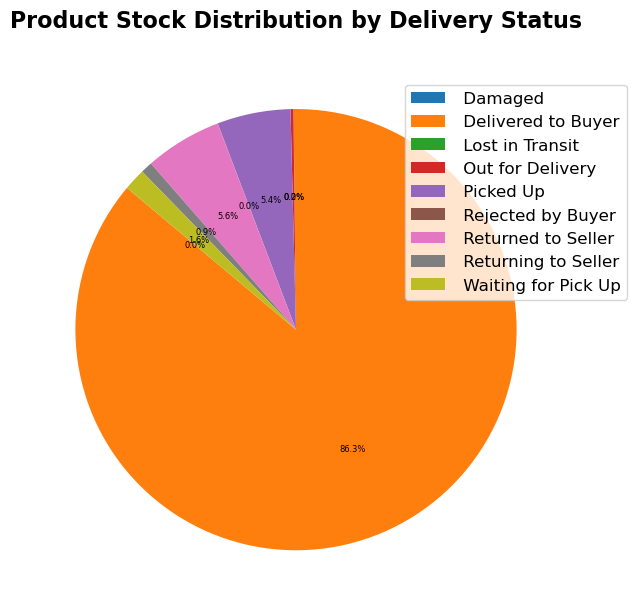

In [84]:
# Grouping and summing up the quantities by delivery status
dff = merged_df.groupby('Delivery status')['Stock'].sum().reset_index()

# Define a custom function to format the percentages
def percentage_format(pct):
    return f'{pct:.1f}%'

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    dff['Stock'], 
    labels=None, 
    autopct=percentage_format, 
    startangle=140, 
    rotatelabels=True,
    textprops={'fontsize': 6, 'color': 'black'}  # Customize the percentage text
)

# Customize the plot
plt.title('Product Stock Distribution by Delivery Status', y=1.08, fontsize=16, weight='bold')  # Title with custom font size and weight
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Add legend
plt.legend(dff['Delivery status'], loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=12)

# Adjust layout
plt.tight_layout()  

plt.show()


<a id=q3><a/>
#### **Research question 3 :** <u>Do B2B customers tend to make larger purchases than non-B2B customers?</u>

In [85]:
merged_df['B2B'].unique()

array([False,  True])

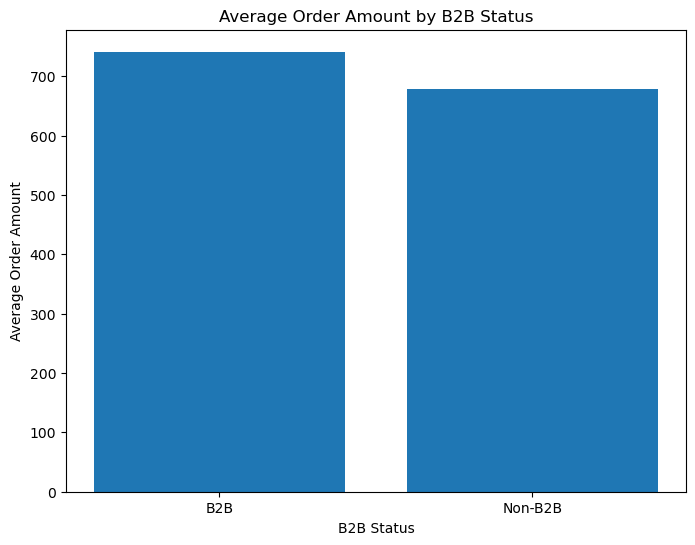

In [86]:
# Calculate average order amounts for B2B and non-B2B
b2b_avg = merged_df[merged_df['B2B'] == True]['Amount'].mean()
non_b2b_avg = merged_df[merged_df['B2B'] == False]['Amount'].mean()

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(['B2B', 'Non-B2B'], [b2b_avg, non_b2b_avg])

plt.xlabel('B2B Status')
plt.ylabel('Average Order Amount')
plt.title('Average Order Amount by B2B Status')
plt.show()

The bar chart shows that the average order amount for B2B customers is higher than the average order amount for non-B2B customers. This suggests that B2B customers tend to make larger purchases on average.

<a id=conclusion><a/>
# Conclusion
The analysis of the Amazon sales data revealed several key insights that can inform strategic decision-making for optimizing inventory management, improving delivery efficiency, and tailoring marketing strategies.

>Firstly, the analysis of product demand across different sizes revealed that sizes M, XL, and L consistently have the highest demand, indicating they are the most popular sizes among customers. This suggests that prioritizing inventory for these sizes could lead to increased sales and reduced stockouts.

>Secondly, the study of stock distribution across delivery statuses showed that the majority of stock is associated with orders that have been delivered to buyers, indicating a strong fulfillment process and efficient delivery operations. This suggests that the current delivery system is performing well, but further analysis could identify potential areas for improvement, such as reducing delivery times or optimizing delivery routes.

>Lastly, the comparison of purchase behavior between B2B and non-B2B customers revealed that B2B customers tend to make larger purchases on average compared to non-B2B customers. This finding suggests that B2B customers are a valuable segment with higher spending potential. Tailoring marketing strategies and pricing models to cater to their specific needs could lead to increased revenue and customer loyalty.

These findings provide valuable information for optimizing inventory management, improving delivery efficiency, and tailoring marketing strategies to different customer segments. By leveraging these insights, businesses can enhance their operations and achieve greater success in the competitive e-commerce landscape.

<a id=Reflection><a/>
###  Reflection
With more time, I would delve deeper into exploring the reasons behind the observed differences in average order amounts between B2B and non-B2B customers. This could involve analyzing product categories, pricing strategies, and order frequency to understand the underlying factors driving this trend. Additionally, I would investigate the distribution of stock across different delivery statuses in more detail, examining the time taken for each status and identifying potential bottlenecks in the delivery process. This would allow for a more comprehensive understanding of the factors influencing delivery performance and provide actionable insights for improving efficiency.

>>#### Creating .txt file

In [87]:
#contain the sale report dataset link 

In [88]:
link = ['https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data?select=Sale+Report.csv'
]

with open('link.txt', 'w') as file:
    for link in link:  
        file.write(link + '\n')  


>> #### Creating .zip folder

In [89]:
# Define the files and folder to be added to the zip file
files_to_zip = [
    'link.txt',
    'Data_Wrangling_Project2.ipynb',
    'data_store'
]

# Create a ZIP file
with zipfile.ZipFile('Real_Data_Wrangling_project2.zip', 'w') as zipf:
    for file in files_to_zip:
        if os.path.isfile(file):  # Check if it's a file
            zipf.write(file, arcname=os.path.basename(file))
        elif os.path.isdir(file):  # Check if it's a directory
            for foldername, subfolders, filenames in os.walk(file):
                for filename in filenames:
                    # Create a relative path for each file
                    filepath = os.path.join(foldername, filename)
                    # Add file to zip file with relative path
                    zipf.write(filepath, arcname=os.path.relpath(filepath, start=file))

print("Files have been successfully zipped.")


Files have been successfully zipped.
